In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


In [2]:
train = pd.read_csv('train.csv')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:

# Cell 5: Handle missing values
train['Age'].fillna(train['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

train.drop('Cabin', axis=1, inplace=True)

train.isnull().sum()


C:\Users\user\AppData\Local\Temp\ipykernel_25904\946999479.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_25904\946999479.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
# Cell 6: Encode categorical variables

train['Sex'] = train['Sex'].map({'male':0, 'female':1})

train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


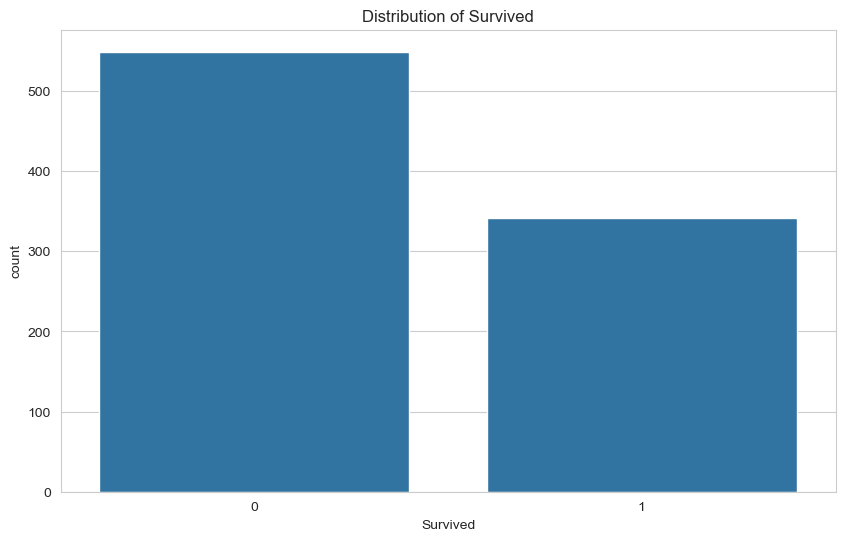

In [7]:
# Cell 7: Distribution of target variable

sns.countplot(x='Survived', data=train)
plt.title("Distribution of Survived")
plt.show()


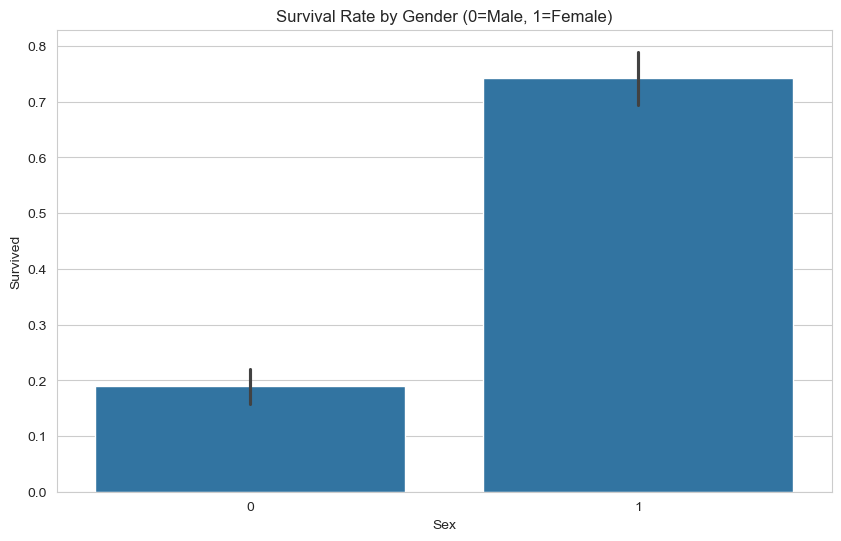

In [8]:
# Cell 8: Survival by Gender

sns.barplot(x='Sex', y='Survived', data=train)
plt.title("Survival Rate by Gender (0=Male, 1=Female)")
plt.show()


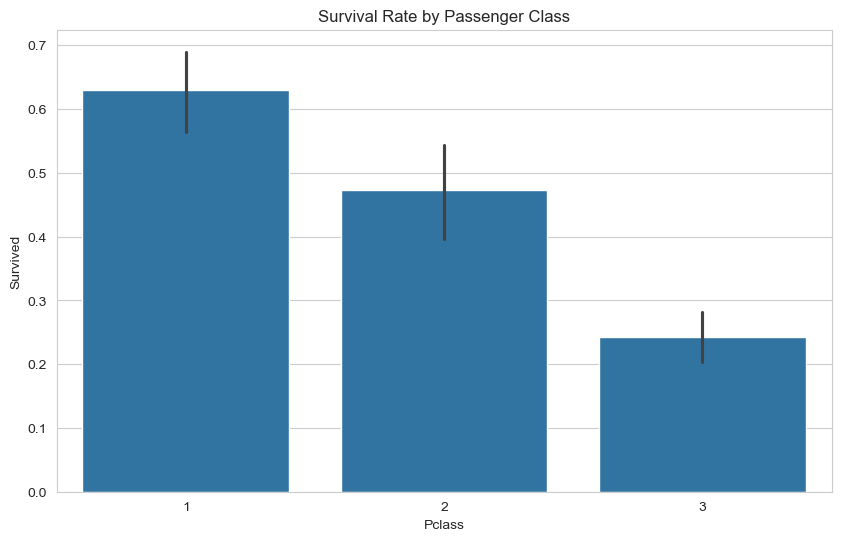

In [9]:
# Cell 9: Survival by Passenger Class

sns.barplot(x='Pclass', y='Survived', data=train)
plt.title("Survival Rate by Passenger Class")
plt.show()


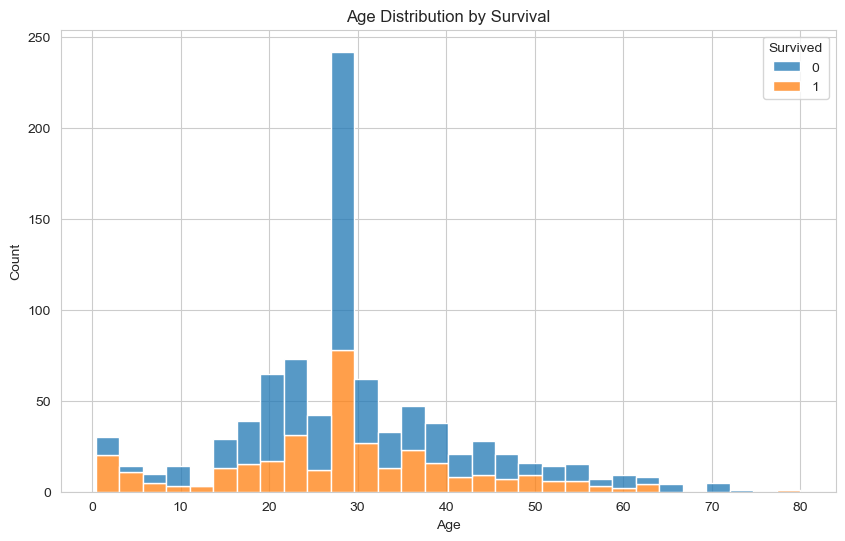

In [10]:
# Cell 10: Age Distribution by Survival

sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title("Age Distribution by Survival")
plt.show()


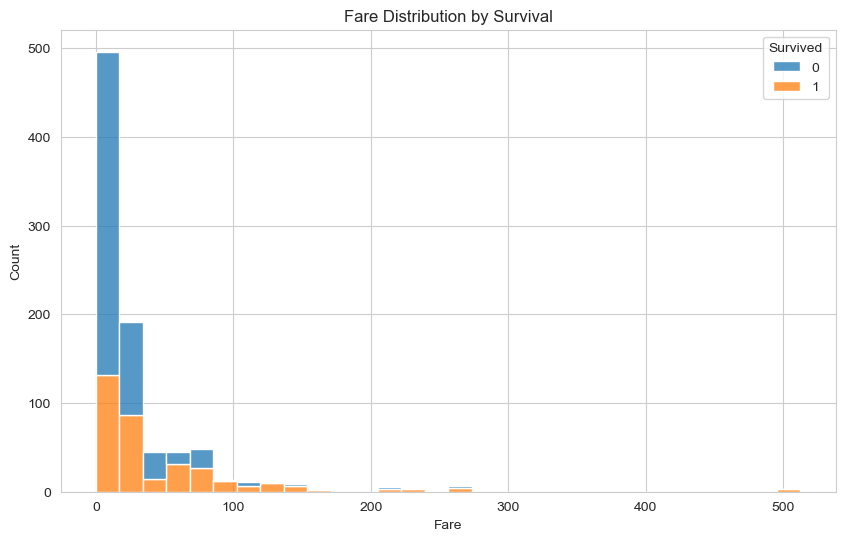

In [11]:
# Cell 11: Fare Distribution by Survival

sns.histplot(data=train, x='Fare', hue='Survived', multiple='stack', bins=30)
plt.title("Fare Distribution by Survival")
plt.show()


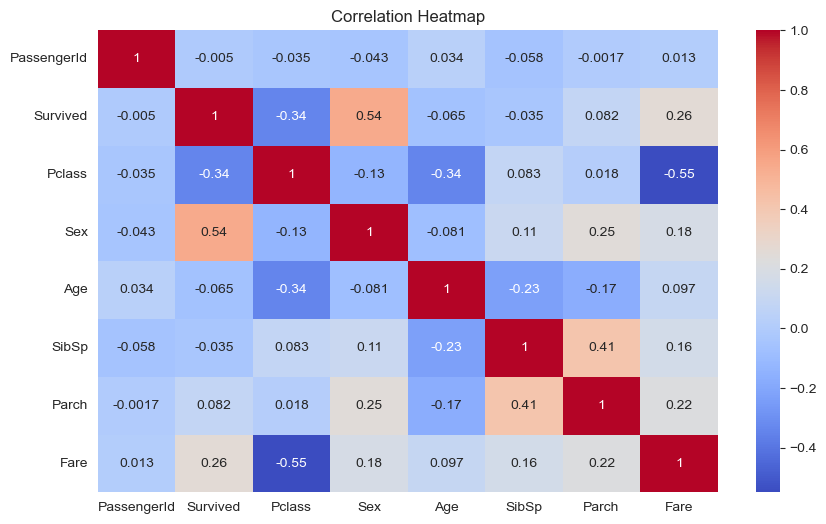

In [13]:
# Cell 12: Correlation Heatmap

numeric_cols = train.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


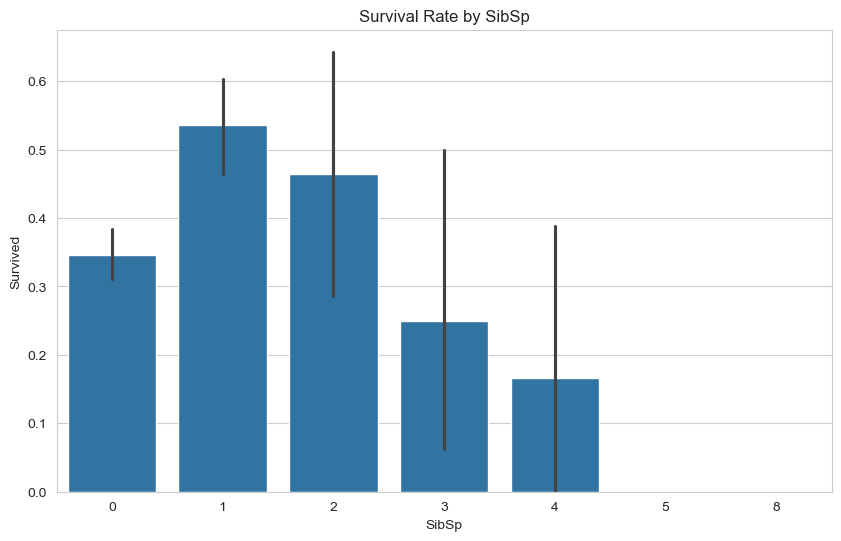

In [14]:
# Cell 13: Survival by SibSp

sns.barplot(x='SibSp', y='Survived', data=train)
plt.title("Survival Rate by SibSp")
plt.show()


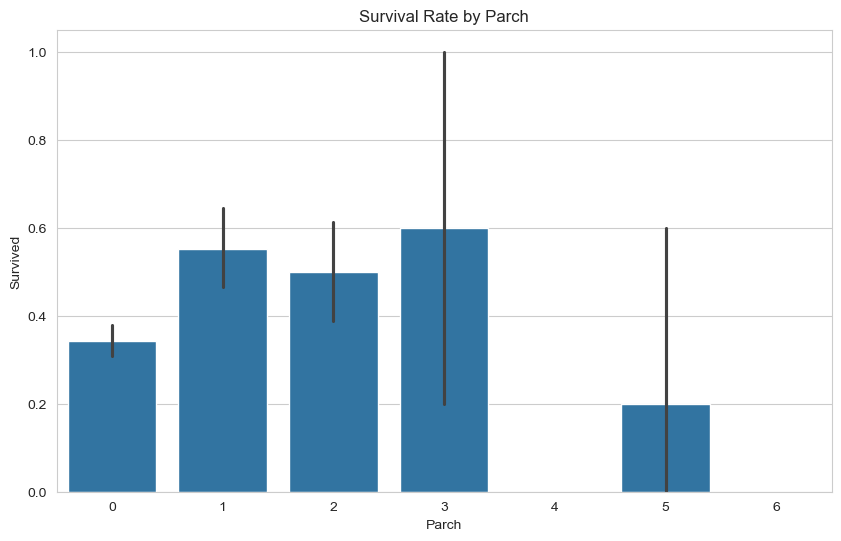

In [15]:
# Cell 14: Survival by Parch

sns.barplot(x='Parch', y='Survived', data=train)
plt.title("Survival Rate by Parch")
plt.show()


In [19]:
# Cell 15: Insights from EDA

print("""
Insights from Titanic EDA:

1. Gender: Females had a much higher survival rate than males.
2. Passenger Class: 1st class passengers survived more than 2nd and 3rd class.
3. Age: Children and younger adults had higher survival rates; older adults less.
4. Fare: Higher fares correlate with better survival chances.
5. Family Size (SibSp/Parch): Small family onboard slightly increased survival probability.
6. Embarked: Cherbourg passengers (Embarked_C) had slightly higher survival.
7. Correlation: Sex and Pclass are the strongest features correlated with survival.
""")



Insights from Titanic EDA:

1. Gender: Females had a much higher survival rate than males.
2. Passenger Class: 1st class passengers survived more than 2nd and 3rd class.
3. Age: Children and younger adults had higher survival rates; older adults less.
4. Fare: Higher fares correlate with better survival chances.
5. Family Size (SibSp/Parch): Small family onboard slightly increased survival probability.
6. Embarked: Cherbourg passengers (Embarked_C) had slightly higher survival.
7. Correlation: Sex and Pclass are the strongest features correlated with survival.

